In [32]:
import pandas as pd

# df = pd.read_csv('data/cleaned_data.csv')
sample_size = 250000
df = pd.read_csv('data/cleaned_data.csv', nrows=sample_size)

In [33]:
# Define ranges
low = df[df['Popularity'] <= 33]
medium = df[(df['Popularity'] > 33) & (df['Popularity'] <= 66)]
high = df[df['Popularity'] > 66]

# Sample the same number from each
n = min(len(low), len(medium), len(high))  # or choose a fixed number
print(f'Lowest group {n}')
low_sample = low.sample(n)
medium_sample = medium.sample(n)
high_sample = high.sample(n)

balanced_df = pd.concat([low_sample, medium_sample, high_sample])

Lowest group 13832


In [3]:
balanced_df.drop('text', inplace=True, axis=1)
balanced_df.drop('Language', inplace=True, axis=1)
df = balanced_df

In [4]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Popularity'])
y = df['Popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_true, y_pred):
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R²:", r2_score(y_true, y_pred))

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

In [7]:
results = []
for name, model in models.items():
    pipeline = Pipeline([
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    # Evaluate as needed
    print(f"{name} fitted and evaluated.")

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    })

LinearRegression fitted and evaluated.
RandomForest fitted and evaluated.
XGBoost fitted and evaluated.


In [8]:
results_df = pd.DataFrame(results)
results_df

,Model,MAE,MSE,R2
0,LinearRegression,16.423171,391.909339,0.302458
1,RandomForest,9.029301,168.524802,0.700050
2,XGBoost,11.398643,221.575089,0.605628


In [9]:
from sklearn.preprocessing import StandardScaler

preprocessor = StandardScaler()

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Models to try
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'eXtremeGBoost': XGBRegressor(random_state=42),
    'GBoost':GradientBoostingRegressor(loss='absolute_error', random_state=42),
    'HGBoosting': HistGradientBoostingRegressor(loss="absolute_error",random_state=42)
}

results = []

# Preprocess and fit each model
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    # Evaluate as needed
    print(f"{name} fitted and evaluated.")

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    })

LinearRegression fitted and evaluated.
RandomForest fitted and evaluated.
eXtremeGBoost fitted and evaluated.
GBoost fitted and evaluated.
HGBoosting fitted and evaluated.


In [49]:
results_df = pd.DataFrame(results)
results_df

,Model,MAE,MSE,R2
0,LinearRegression,16.423171,391.909339,0.302458
1,RandomForest,9.024775,168.388777,0.700292
2,eXtremeGBoost,11.398643,221.575089,0.605628
3,GBoost,15.178873,352.963434,0.371776
4,HGBoosting,13.162735,291.162131,0.481773


In [44]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 150],  # Reduced from 100-300
    'max_depth': [None, 5, 10],      # Reduced depth
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_samples': [0.5, 0.7]        # Train on subsets of data
}

rf = RandomForestRegressor(
    random_state=42,
    warm_start=True  # Reuse prior model for faster iterations
)
search = RandomizedSearchCV(
    rf,
    param_grid,
    n_iter=5,
    cv=4,
    scoring='neg_mean_absolute_error',  # Optimizes MAE
    n_jobs=-1,  # Use all CPU cores
    random_state=42
)
search.fit(X_train, y_train)
best_rf = search.best_estimator_

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure X_test and y_test are defined in your environment
y_pred = best_rf.predict(X_test)  # Generate predictions

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

R²: 0.6773
MSE: 181.2815
MAE: 9.6298


In [47]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_

KeyboardInterrupt: 

In [12]:
best_rf.feature_importances_

array([6.52528015e-02, 5.66833433e-02, 6.28660373e-03, 4.81901715e-02,
       5.53197818e-02, 5.45201269e-02, 3.95440720e-02, 4.61133732e-02,
       4.69841562e-02, 1.64428965e-02, 1.21103606e-01, 1.08378220e-03,
       4.66237710e-04, 2.17614987e-02, 2.34975567e-04, 4.46455354e-04,
       1.99098544e-03, 3.82565056e-02, 2.76031225e-03, 8.25783409e-02,
       4.07283985e-07, 2.08736058e-06, 3.56311438e-03, 6.43818706e-07,
       0.00000000e+00, 2.34617318e-03, 0.00000000e+00, 4.19120962e-03,
       2.81688892e-03, 2.09974039e-06, 3.81831413e-03, 9.80132471e-04,
       3.83740100e-08, 2.95105375e-02, 2.93636602e-02, 3.40717139e-02,
       4.98674984e-03, 3.67549167e-03, 2.85709863e-03, 3.68808227e-03,
       2.76184084e-03, 3.01197177e-03, 3.51155443e-03, 3.95351513e-03,
       2.69941990e-03, 4.16856178e-03, 3.41027239e-03, 3.80505116e-03,
       1.77835795e-03, 1.85074265e-03, 1.67191798e-03, 2.63349976e-03,
       3.44542471e-03, 2.93414382e-03, 2.91216175e-03, 3.28708832e-03,
      

In [13]:
import numpy as np

# Assuming best_rf is already trained
feature_importances = best_rf.feature_importances_

# Sort features by importance (descending)
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]

# Print readable output
print("Feature importances (sorted):")
for i, importance in enumerate(sorted_importances):
    print(f"Feature {sorted_indices[i]}: {importance:.4f}")

Feature importances (sorted):
Feature 10: 0.1211
Feature 19: 0.0826
Feature 0: 0.0653
Feature 65: 0.0611
Feature 1: 0.0567
Feature 4: 0.0553
Feature 5: 0.0545
Feature 3: 0.0482
Feature 8: 0.0470
Feature 7: 0.0461
Feature 6: 0.0395
Feature 17: 0.0383
Feature 35: 0.0341
Feature 33: 0.0295
Feature 34: 0.0294
Feature 13: 0.0218
Feature 9: 0.0164
Feature 71: 0.0091
Feature 2: 0.0063
Feature 75: 0.0061
Feature 36: 0.0050
Feature 72: 0.0047
Feature 27: 0.0042
Feature 45: 0.0042
Feature 57: 0.0040
Feature 43: 0.0040
Feature 30: 0.0038
Feature 47: 0.0038
Feature 56: 0.0038
Feature 39: 0.0037
Feature 37: 0.0037
Feature 22: 0.0036
Feature 59: 0.0035
Feature 42: 0.0035
Feature 74: 0.0035
Feature 67: 0.0035
Feature 52: 0.0034
Feature 46: 0.0034
Feature 55: 0.0033
Feature 66: 0.0030
Feature 69: 0.0030
Feature 41: 0.0030
Feature 53: 0.0029
Feature 54: 0.0029
Feature 38: 0.0029
Feature 28: 0.0028
Feature 40: 0.0028
Feature 18: 0.0028
Feature 70: 0.0027
Feature 44: 0.0027
Feature 58: 0.0027
Feature 51:

In [24]:
import numpy as np

# feature_importances = best_rf.feature_importances_
feature_importances = rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
feature_names = X_train.columns
print("Feature importances (sorted):")
for i in sorted_indices:
    print(f"{feature_names[i]}: {feature_importances[i]:.4f}")

Feature importances (sorted):
Good for Party: 0.1160
Loudness: 0.0828
Danceability: 0.0596
Length: 0.0567
Good for Exercise: 0.0542
Energy: 0.0471
Word count: 0.0464
Good for Social Gatherings: 0.0445
Positiveness: 0.0440
Tempo: 0.0429
Acousticness: 0.0407
Speechiness: 0.0369
Liveness: 0.0351
Age: 0.0327
Year: 0.0312
Month: 0.0293
genre_pop: 0.0258
Instrumentalness: 0.0170
Good for Morning Routine: 0.0096
Year Bin: 0.0085
genre_rock: 0.0080
Explicit: 0.0078
Major: 0.0055
genre_rap: 0.0050
Single: 0.0050
has_oh: 0.0049
has_yeah: 0.0048
key_D Maj: 0.0037
key_G Maj: 0.0033
emotion_joy: 0.0033
has_baby: 0.0033
key_C Maj: 0.0031
key_C# Maj: 0.0031
Good for Driving: 0.0030
key_A Maj: 0.0030
key_F# min: 0.0029
genre_rnb: 0.0028
emotion_anger: 0.0028
key_C# min: 0.0027
emotion_sadness: 0.0027
key_C min: 0.0026
has_of: 0.0026
emotion_fear: 0.0025
genre_folk: 0.0025
genre_others: 0.0025
key_G# Maj: 0.0024
key_F# Maj: 0.0024
key_F Maj: 0.0023
genre_electronic: 0.0023
emotion_love: 0.0022
key_E mi

In [43]:
import pandas as pd

df = pd.read_csv('data/cleaned_data.csv')

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Models to try
models = {
    'RandomForest': RandomForestRegressor(random_state=42)
}

results = []

# Preprocess and fit each model
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    # Evaluate as needed
    print(f"{name} fitted and evaluated.")

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    })

RandomForest fitted and evaluated.


In [27]:
results_df = pd.DataFrame(results)
results_df

,Model,MAE,MSE,R2
0,RandomForest,9.024775,168.388777,0.700292


In [28]:
import pandas as pd

df = pd.read_csv('data/cleaned_data.csv')
low = df[df['Popularity'] <= 33]
medium = df[(df['Popularity'] > 33) & (df['Popularity'] <= 66)]
high = df[df['Popularity'] > 66]

# Sample the same number from each
n = min(len(low), len(medium), len(high))  # or choose a fixed number
print(f'Lowest group {n}')
low_sample = low.sample(n)
medium_sample = medium.sample(n)
high_sample = high.sample(n)

balanced_df = pd.concat([low_sample, medium_sample, high_sample])
df = balanced_df

Lowest group 29796


In [31]:
# Check with balanced dataset
results_df = pd.DataFrame(results)
results_df

,Model,MAE,MSE,R2
0,RandomForest,9.024775,168.388777,0.700292


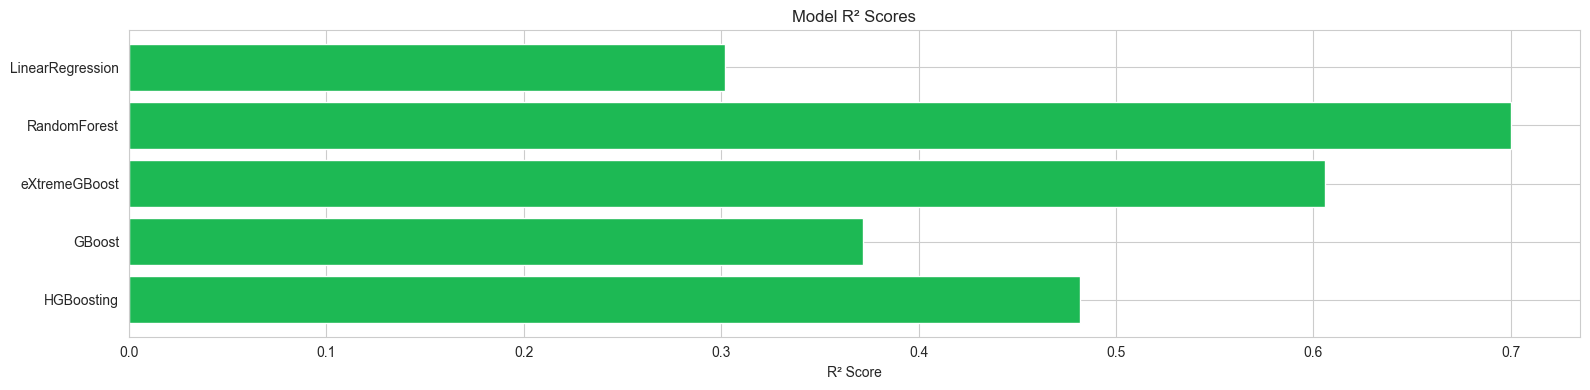

In [56]:
import matplotlib.pyplot as plt

# Data
models = ['LinearRegression', 'RandomForest', 'eXtremeGBoost', 'GBoost', 'HGBoosting']
r2_scores = [0.302, 0.700, 0.606, 0.372, 0.482]  # Rounded for brevity

# Spotify green color
spotify_green = '#1DB954'

fig, ax = plt.subplots(figsize=(16, 4))

# Horizontal bar plot
ax.barh(models, r2_scores, color=spotify_green)

# Set white background
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Labels and title
ax.set_xlabel('R² Score')
ax.set_title('Model R² Scores')

# Invert y-axis to have the highest R² on top
ax.invert_yaxis()

plt.tight_layout()
plt.show()

